# Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

It can be observed that there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, the organization needs to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed our team to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Steps followed

**1. Importing the Data**
**<br>2. Inspecting the Dataframe and Exploratory Data Analysis**
**<br>3. Data Preparation**
**<br>4. Dummy feature creation (one-hot encoded)**
**<br>5. Test Train split**
**<br>6. Feature Scaling**
**<br>7. Looking at correaltion**
**<br>8. Model Building**
**<br>9. Model evaluation and optimization**
**<br>10. Business Evaluation : Precision and Recall**
**<br>11. Making prediction for the test data**
**<br>12. Conclusion**
**<br>13. Convert Predicted Probability to Score**

## 1. Importing the Data

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# set seaborn theme if you prefer
sns.set(style="darkgrid")

In [2]:
# Importing the Leads.csv file
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. Inspecting the Dataframe and Exploratory Data Analysis

In [3]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
#Checking for duplicate rows
sum(lead_data.duplicated(subset = 'Prospect ID'))

0

In [7]:
## check all the variables in the data set
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Converting to uppercase

In [8]:
## Firstly we should convert all data to upper case so that we don't face 
## case sentivity issues while analyzing the data further
lead_data=lead_data.apply(lambda x: x.str.upper() if(x.dtype == 'object') else x)

### Imputing 'SELECT' as 'nan'(null)

In [9]:
## Before we start checking null values we need to convert SELECT values into null
# Converting Select to Null values across all columns whereever applicable
lead_data.loc[lead_data['Specialization']=='SELECT',['Specialization']] = np.nan
lead_data.loc[lead_data['How did you hear about X Education']=='SELECT'
              ,['How did you hear about X Education']] = np.nan
lead_data.loc[lead_data['Lead Profile']=='SELECT',['Lead Profile']] = np.nan
lead_data.loc[lead_data['City']=='SELECT',['City']] = np.nan
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927B2DF-8BBA-4D29-B9A2-B6E0BEAFE620,660737,API,OLARK CHAT,NO,NO,0,0.0,0,0.0,...,NO,NaN,NaN,02.MEDIUM,02.MEDIUM,15.0,15.0,NO,NO,MODIFIED
1,2A272436-5132-4136-86FA-DCC88C88F482,660728,API,ORGANIC SEARCH,NO,NO,0,5.0,674,2.5,...,NO,NaN,NaN,02.MEDIUM,02.MEDIUM,15.0,15.0,NO,NO,EMAIL OPENED
2,8CC8C611-A219-4F35-AD23-FDFD2656BD8A,660727,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,NO,1,2.0,1532,2.0,...,NO,POTENTIAL LEAD,MUMBAI,02.MEDIUM,01.HIGH,14.0,20.0,NO,YES,EMAIL OPENED
3,0CC2DF48-7CF4-4E39-9DE9-19797F9B38CC,660719,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,NO,0,1.0,305,1.0,...,NO,NaN,MUMBAI,02.MEDIUM,01.HIGH,13.0,17.0,NO,NO,MODIFIED
4,3256F628-E534-4826-9D63-4A8B88782852,660681,LANDING PAGE SUBMISSION,GOOGLE,NO,NO,1,2.0,1428,1.0,...,NO,NaN,MUMBAI,02.MEDIUM,01.HIGH,15.0,18.0,NO,NO,MODIFIED


### Finding and dropping columns with only one category

In [10]:
## Checking the unique values across columns
lead_data.apply(pd.Series.nunique)

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
## Dropping all the variables that have all the values as same
## These need to be dropped as they don't provide any variations
lead_data = lead_data.loc[:,lead_data.apply(pd.Series.nunique) != 1]
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927B2DF-8BBA-4D29-B9A2-B6E0BEAFE620,660737,API,OLARK CHAT,NO,NO,0,0.0,0,0.0,...,INTERESTED IN OTHER COURSES,LOW IN RELEVANCE,NaN,NaN,02.MEDIUM,02.MEDIUM,15.0,15.0,NO,MODIFIED
1,2A272436-5132-4136-86FA-DCC88C88F482,660728,API,ORGANIC SEARCH,NO,NO,0,5.0,674,2.5,...,RINGING,NaN,NaN,NaN,02.MEDIUM,02.MEDIUM,15.0,15.0,NO,EMAIL OPENED
2,8CC8C611-A219-4F35-AD23-FDFD2656BD8A,660727,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,NO,1,2.0,1532,2.0,...,WILL REVERT AFTER READING THE EMAIL,MIGHT BE,POTENTIAL LEAD,MUMBAI,02.MEDIUM,01.HIGH,14.0,20.0,YES,EMAIL OPENED
3,0CC2DF48-7CF4-4E39-9DE9-19797F9B38CC,660719,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,NO,0,1.0,305,1.0,...,RINGING,NOT SURE,NaN,MUMBAI,02.MEDIUM,01.HIGH,13.0,17.0,NO,MODIFIED
4,3256F628-E534-4826-9D63-4A8B88782852,660681,LANDING PAGE SUBMISSION,GOOGLE,NO,NO,1,2.0,1428,1.0,...,WILL REVERT AFTER READING THE EMAIL,MIGHT BE,NaN,MUMBAI,02.MEDIUM,01.HIGH,15.0,18.0,NO,MODIFIED


In [12]:
lead_data.apply(pd.Series.nunique)

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

### Checking variation and distribution for catagorical variable and dropping the skewed columns

In [13]:
#identify numerical and non-numerical columns automatically
NonNumCols = []
NumCols = []

for col in list(lead_data):
    if lead_data[col].dtypes == 'object':
        NonNumCols.append(col)
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Numerical columns:
 ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [14]:
#Value counts in each non-num columns
NonNumCols_list = NonNumCols.copy()
NonNumCols_list.remove('Prospect ID')
for i in NonNumCols_list:
    print(i, '------------->','\n', lead_data[i].value_counts())
    print('\n')

Lead Origin -------------> 
 LANDING PAGE SUBMISSION    4886
API                        3580
LEAD ADD FORM               718
LEAD IMPORT                  55
QUICK ADD FORM                1
Name: Lead Origin, dtype: int64


Lead Source -------------> 
 GOOGLE               2873
DIRECT TRAFFIC       2543
OLARK CHAT           1755
ORGANIC SEARCH       1154
REFERENCE             534
WELINGAK WEBSITE      142
REFERRAL SITES        125
FACEBOOK               55
BING                    6
CLICK2CALL              4
PRESS_RELEASE           2
LIVE CHAT               2
SOCIAL MEDIA            2
WELEARN                 1
BLOG                    1
TESTONE                 1
PAY PER CLICK ADS       1
YOUTUBECHANNEL          1
WELEARNBLOG_HOME        1
NC_EDM                  1
Name: Lead Source, dtype: int64


Do Not Email -------------> 
 NO     8506
YES     734
Name: Do Not Email, dtype: int64


Do Not Call -------------> 
 NO     9238
YES       2
Name: Do Not Call, dtype: int64


Last Activity ----

In [15]:
## based on the EDA perfomed above the values the variation acroos the complete data is very less
## only very rare records present different values. Such variables don't add any value almost all the
## values remain constant. e.g. in column "Do Not Call" 9238 values among 9240 have value as "No".
## As such variation is almost zero. Such columns can be dropped.
lead_data = lead_data.drop(['Do Not Call','What matters most to you in choosing a course','Newspaper Article',
                            'Search','Digital Advertisement','X Education Forums','Newspaper',
                            'Through Recommendations'], axis=1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927B2DF-8BBA-4D29-B9A2-B6E0BEAFE620,660737,API,OLARK CHAT,NO,0,0.0,0,0.0,PAGE VISITED ON WEBSITE,...,INTERESTED IN OTHER COURSES,LOW IN RELEVANCE,NaN,NaN,02.MEDIUM,02.MEDIUM,15.0,15.0,NO,MODIFIED
1,2A272436-5132-4136-86FA-DCC88C88F482,660728,API,ORGANIC SEARCH,NO,0,5.0,674,2.5,EMAIL OPENED,...,RINGING,NaN,NaN,NaN,02.MEDIUM,02.MEDIUM,15.0,15.0,NO,EMAIL OPENED
2,8CC8C611-A219-4F35-AD23-FDFD2656BD8A,660727,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,1,2.0,1532,2.0,EMAIL OPENED,...,WILL REVERT AFTER READING THE EMAIL,MIGHT BE,POTENTIAL LEAD,MUMBAI,02.MEDIUM,01.HIGH,14.0,20.0,YES,EMAIL OPENED
3,0CC2DF48-7CF4-4E39-9DE9-19797F9B38CC,660719,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,0,1.0,305,1.0,UNREACHABLE,...,RINGING,NOT SURE,NaN,MUMBAI,02.MEDIUM,01.HIGH,13.0,17.0,NO,MODIFIED
4,3256F628-E534-4826-9D63-4A8B88782852,660681,LANDING PAGE SUBMISSION,GOOGLE,NO,1,2.0,1428,1.0,CONVERTED TO LEAD,...,WILL REVERT AFTER READING THE EMAIL,MIGHT BE,NaN,MUMBAI,02.MEDIUM,01.HIGH,15.0,18.0,NO,MODIFIED


### Checking for outliers

In [16]:
lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
          'Asymmetrique Activity Score','Asymmetrique Profile Score']].describe(
            percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
90%,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


**Note** : We can observe that there are outliers. However, we are not trating them as these outliers can itself impact the conversion of the leads.

## 3. Data Preparation

In [17]:
# Check the number of missing values in each column

lead_data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
How did you hear about X Education        7250
What is your current occupation           2690
Tags                                      3353
Lead Quality                              4767
Lead Profile                              6855
City                                      3669
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique 

In [18]:
# Check the null percentage for each column
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              74.19
City                                      39.71
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score             

As you can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Let's eliminate the columns having greater than 40% missing values as they are of no use to us.

In [19]:
# Drop all the columns in which greater than 40% missing values are present

lead_data.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
               'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], 1, inplace=True)

**Drop the Score variable entered by Sales team (Tags, Lead Quality, Lead Profile, Asymmetrique Activity Index,
Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score)**

In [20]:
# Only Tags column is present, so drop Tags
lead_data.drop(['Tags'], 1, inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927B2DF-8BBA-4D29-B9A2-B6E0BEAFE620,660737,API,OLARK CHAT,NO,0,0.0,0,0.0,PAGE VISITED ON WEBSITE,NaN,NaN,UNEMPLOYED,NaN,NO,MODIFIED
1,2A272436-5132-4136-86FA-DCC88C88F482,660728,API,ORGANIC SEARCH,NO,0,5.0,674,2.5,EMAIL OPENED,INDIA,NaN,UNEMPLOYED,NaN,NO,EMAIL OPENED
2,8CC8C611-A219-4F35-AD23-FDFD2656BD8A,660727,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,1,2.0,1532,2.0,EMAIL OPENED,INDIA,BUSINESS ADMINISTRATION,STUDENT,MUMBAI,YES,EMAIL OPENED
3,0CC2DF48-7CF4-4E39-9DE9-19797F9B38CC,660719,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,0,1.0,305,1.0,UNREACHABLE,INDIA,MEDIA AND ADVERTISING,UNEMPLOYED,MUMBAI,NO,MODIFIED
4,3256F628-E534-4826-9D63-4A8B88782852,660681,LANDING PAGE SUBMISSION,GOOGLE,NO,1,2.0,1428,1.0,CONVERTED TO LEAD,INDIA,NaN,UNEMPLOYED,MUMBAI,NO,MODIFIED


In [21]:
lead_data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
What is your current occupation           2690
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [22]:
## Imputing the nulls across different variables with some values

## Most of the catagorical data is set with a new value of UNKNOWN so that all the leads 
## are included in the final data set so that the guiding data model is able to handle such cases.
## This new value "UNKNOWN" makes sence because we exactly don't know the actual value.
## It is assumed that in real scenarios while predictions many data values won't be available but still 
## model needs to provide the best prediction. 
## All these imputed values for "UNKNOWN" are expected to convert into
## additional dummy variables and most probably become insignificant later but the data for all leads 
## will be retained.

#Imputing null Lead Source with "UNKNOWN"
lead_data.loc[lead_data['Lead Source'].isnull(),['Lead Source']] = 'UNKNOWN'

# Imputing he "TotalVisits" with mean value
lead_data.loc[lead_data['TotalVisits'].isnull(),['TotalVisits']] = lead_data['TotalVisits'].mean()

# Imputing "Page Views Per Visit" with mean value
lead_data.loc[lead_data['Page Views Per Visit'].isnull()
              ,['Page Views Per Visit']]= lead_data['Page Views Per Visit'].mean()

#Imputing null "Country" with "UNKNOWN"
lead_data.loc[lead_data['Country'].isnull(),['Country']] = 'UNKNOWN'

#Imputing null "Lead Activity" with "UNKNOWN"
lead_data.loc[lead_data['Last Activity'].isnull(),['Last Activity']] = 'UNKNOWN'

#Imputing null "Specialization" with "UNKNOWN"
lead_data.loc[lead_data['Specialization'].isnull(),['Specialization']] = 'UNKNOWN'

#Imputing null "What is your current occupation" with "UNKNOWN"
lead_data.loc[lead_data['What is your current occupation'].isnull(),['What is your current occupation']] = 'UNKNOWN'

#Imputing null "City" with "UNKNOWN"
lead_data.loc[lead_data['City'].isnull(),['City']] = 'UNKNOWN'

## checking the null data across all variables now
print(round(100*(lead_data.isnull().sum())/len(lead_data.index), 2))

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


#### Converting some binary variables (Yes/No) to 1/0

In [23]:
## checking the unique values across columns now
## to manually analyze the number of dummy columns that will be created
## for each catagorical column
lead_data.apply(pd.Series.nunique)

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                 21
Do Not Email                                 2
Converted                                    2
TotalVisits                                 42
Total Time Spent on Website               1731
Page Views Per Visit                       115
Last Activity                               18
Country                                     38
Specialization                              19
What is your current occupation              7
City                                         7
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [24]:
## As part of model data preparation, converting YES/NO values to 1/0

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

## Defining the map function
def binary_map(x):
    return x.map({'YES': 1, "NO": 0})

lead_data[varlist] = lead_data[varlist].apply(binary_map)

## 4. For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [25]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
City                                      9240 non-null object
A free copy o

In [26]:
## Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source','Specialization',
       'What is your current occupation','City','Last Notable Activity','Last Activity','Country']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

## Now we can drop the original columns which have been converted to dummies
lead_data = lead_data.drop(['Lead Origin', 'Lead Source','Specialization',
       'What is your current occupation','City','Last Notable Activity','Last Activity','Country'], axis=1)

In [27]:
## We have a Lead number so we can drop prospect ID
lead_data = lead_data.drop(['Prospect ID'], axis=1)
lead_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,...,Country_SRI LANKA,Country_SWEDEN,Country_SWITZERLAND,Country_TANZANIA,Country_UGANDA,Country_UNITED ARAB EMIRATES,Country_UNITED KINGDOM,Country_UNITED STATES,Country_UNKNOWN,Country_VIETNAM
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Test Train split

In [28]:
## taking all variables to X ignoring Lead Number and Converted (this is Y variable)
X = lead_data.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Lead Source_BLOG,...,Country_SRI LANKA,Country_SWEDEN,Country_SWITZERLAND,Country_TANZANIA,Country_UGANDA,Country_UNITED ARAB EMIRATES,Country_UNITED KINGDOM,Country_UNITED STATES,Country_UNKNOWN,Country_VIETNAM
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
## taking Converted as Y variable
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [30]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 6. Feature Scaling

In [31]:
## Applying the standard scaler across all the numberical variables

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
            X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Lead Source_BLOG,...,Country_SRI LANKA,Country_SWEDEN,Country_SWITZERLAND,Country_TANZANIA,Country_UGANDA,Country_UNITED ARAB EMIRATES,Country_UNITED KINGDOM,Country_UNITED STATES,Country_UNKNOWN,Country_VIETNAM
1871,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0,0.099483,0.005716,-0.473232,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.288795,-0.691418,0.067847,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0,0.288795,1.365219,1.223999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
## checking the percentage of Converted across the data
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.53896103896104

## 7. Looking at Correlations

In [33]:
# Looking at the correlation table

lead_data.corr()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,...,Country_SRI LANKA,Country_SWEDEN,Country_SWITZERLAND,Country_TANZANIA,Country_UGANDA,Country_UNITED ARAB EMIRATES,Country_UNITED KINGDOM,Country_UNITED STATES,Country_UNKNOWN,Country_VIETNAM
Lead Number,1.000000,-0.098529,0.025157,0.021993,0.020329,0.058198,-0.109696,-0.075012,0.029158,0.104726,...,0.014135,0.007412,-0.010849,-0.004507,-0.006344,-0.009372,0.004616,-0.033562,-0.028259,-0.013308
Do Not Email,-0.098529,1.000000,-0.135580,0.033609,-0.046374,0.033351,0.055762,0.095304,-0.020983,-0.017529,...,-0.003056,-0.005294,-0.003056,-0.003056,-0.004322,-0.001114,0.017978,0.076791,-0.049665,-0.003056
Converted,0.025157,-0.135580,1.000000,0.030091,0.362483,-0.003294,-0.039820,-0.051236,0.321702,-0.023695,...,-0.008238,-0.001928,-0.008238,-0.008238,-0.011651,-0.001253,-0.004313,-0.022192,0.063660,-0.008238
TotalVisits,0.021993,0.033609,0.030091,1.000000,0.218409,0.512125,0.201580,0.289438,-0.160978,-0.028849,...,0.003357,0.005815,-0.003120,-0.003120,-0.004413,0.014991,0.008548,0.006856,-0.380678,-0.003120
Total Time Spent on Website,0.020329,-0.046374,0.362483,0.218409,1.000000,0.316262,0.168298,0.276009,-0.139681,-0.034926,...,-0.003184,-0.002928,0.002531,-0.003658,-0.007591,0.008876,0.008161,0.009049,-0.436185,-0.006392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_UNITED ARAB EMIRATES,-0.009372,-0.001114,-0.001253,0.014991,0.008876,0.034358,0.060085,0.040119,-0.022047,-0.005878,...,-0.000790,-0.001369,-0.000790,-0.000790,-0.001118,1.000000,-0.003063,-0.006588,-0.045827,-0.000790
Country_UNITED KINGDOM,0.004616,0.017978,-0.004313,0.008548,0.008161,0.016363,0.025006,0.027294,-0.011705,-0.003120,...,-0.000420,-0.000727,-0.000420,-0.000420,-0.000593,-0.003063,1.000000,-0.003498,-0.024330,-0.000420
Country_UNITED STATES,-0.033562,0.076791,-0.022192,0.006856,0.009049,-0.000595,0.047280,0.049142,-0.020481,-0.006712,...,-0.000902,-0.001563,-0.000902,-0.000902,-0.001276,-0.006588,-0.003498,1.000000,-0.052335,-0.000902
Country_UNKNOWN,-0.028259,-0.049665,0.063660,-0.380678,-0.436185,-0.587804,-0.395222,-0.621510,0.456404,0.128253,...,-0.006277,-0.010873,-0.006277,-0.006277,-0.008878,-0.045827,-0.024330,-0.052335,1.000000,-0.006277


In [34]:
## After manual analysis from the above heatmap the correlation for some columns was found to very above
## 0.8. Therefore, one of these variables with high correlation can be dropped.
## We are dropping following valiables which are correlated to some other variable and hence variations can be
## expressed as different variables present in the model.

## dropping one of the highly correlated variable from the the test dataset.
X_test = X_test.drop(['Lead Source_FACEBOOK','Lead Source_REFERENCE','Specialization_UNKNOWN'
                      ,'Last Activity_EMAIL LINK CLICKED','Last Activity_EMAIL MARKED SPAM','Last Activity_EMAIL OPENED'
                      ,'Last Activity_EMAIL RECEIVED','Last Activity_RESUBSCRIBED TO EMAILS','Last Activity_SMS SENT'
                      ,'Last Activity_UNSUBSCRIBED','City_UNKNOWN'
                      ,'What is your current occupation_UNKNOWN'], axis=1
                    )

## dropping one of the highly correlated variable from the the train dataset.
X_train = X_train.drop(['Lead Source_FACEBOOK','Lead Source_REFERENCE','Specialization_UNKNOWN'
                      ,'Last Activity_EMAIL LINK CLICKED','Last Activity_EMAIL MARKED SPAM','Last Activity_EMAIL OPENED'
                      ,'Last Activity_EMAIL RECEIVED','Last Activity_RESUBSCRIBED TO EMAILS','Last Activity_SMS SENT'
                      ,'Last Activity_UNSUBSCRIBED','City_UNKNOWN'
                      ,'What is your current occupation_UNKNOWN'], axis=1)

In [35]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 130 entries, Lead Number to Country_VIETNAM
dtypes: float64(2), int64(5), uint8(123)
memory usage: 1.6 MB


In [36]:
lead_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,...,Country_SRI LANKA,Country_SWEDEN,Country_SWITZERLAND,Country_TANZANIA,Country_UGANDA,Country_UNITED ARAB EMIRATES,Country_UNITED KINGDOM,Country_UNITED STATES,Country_UNKNOWN,Country_VIETNAM
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 8. Model Building

In [37]:
logreg = LogisticRegression()

In [38]:
## running RFE with 25 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             
rfe = rfe.fit(X_train, y_train)

In [39]:
## chcking status of support for different feature variables
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False])

In [40]:
## checking ranking for all the feature variables as provided by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 58),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 64),
 ('A free copy of Mastering The Interview', False, 69),
 ('Lead Origin_LANDING PAGE SUBMISSION', False, 13),
 ('Lead Origin_LEAD ADD FORM', True, 1),
 ('Lead Origin_LEAD IMPORT', True, 1),
 ('Lead Origin_QUICK ADD FORM', False, 71),
 ('Lead Source_BLOG', False, 52),
 ('Lead Source_CLICK2CALL', False, 12),
 ('Lead Source_DIRECT TRAFFIC', False, 38),
 ('Lead Source_GOOGLE', False, 41),
 ('Lead Source_LIVE CHAT', False, 62),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_OLARK CHAT', False, 77),
 ('Lead Source_ORGANIC SEARCH', False, 40),
 ('Lead Source_PAY PER CLICK ADS', False, 53),
 ('Lead Source_PRESS_RELEASE', False, 54),
 ('Lead Source_REFERRAL SITES', False, 39),
 ('Lead Source_SOCIAL MEDIA', False, 4),
 ('Lead Source_TESTONE', False, 89),
 ('Lead Source_UNKNOWN', False, 83),
 ('Lead Source_WELEARN', False, 47),
 ('Lead Source_WELEARNBLOG_HOME'

In [41]:
## list of all classified 25 feature vaiable picked by RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_LEAD ADD FORM', 'Lead Origin_LEAD IMPORT',
       'Lead Source_NC_EDM', 'Lead Source_WELINGAK WEBSITE',
       'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_STUDENT',
       'What is your current occupation_UNEMPLOYED',
       'What is your current occupation_WORKING PROFESSIONAL',
       'Last Notable Activity_EMAIL BOUNCED',
       'Last Notable Activity_HAD A PHONE CONVERSATION',
       'Last Notable Activity_RESUBSCRIBED TO EMAILS',
       'Last Notable Activity_SMS SENT', 'Last Notable Activity_UNREACHABLE',
       'Last Activity_CONVERTED TO LEAD', 'Last Activity_EMAIL BOUNCED',
       'Last Activity_HAD A PHONE CONVERSATION',
       'Last Activity_OLARK CHAT CONVERSATION', 'Last Activity_UNKNOWN',
       'Last Activity_UNREACHABLE', 'Country_NIGERIA', 'Country_QATAR',
       'Country_SAUDI ARABIA', 'Country_UNKNOWN'],
      dtype='object')


In [42]:
## list for all variables who could not make to top 25 feature variables picked by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_LANDING PAGE SUBMISSION', 'Lead Origin_QUICK ADD FORM',
       'Lead Source_BLOG', 'Lead Source_CLICK2CALL',
       'Lead Source_DIRECT TRAFFIC', 'Lead Source_GOOGLE',
       'Lead Source_LIVE CHAT', 'Lead Source_OLARK CHAT',
       'Lead Source_ORGANIC SEARCH', 'Lead Source_PAY PER CLICK ADS',
       'Lead Source_PRESS_RELEASE', 'Lead Source_REFERRAL SITES',
       'Lead Source_SOCIAL MEDIA', 'Lead Source_TESTONE',
       'Lead Source_UNKNOWN', 'Lead Source_WELEARN',
       'Lead Source_WELEARNBLOG_HOME', 'Lead Source_YOUTUBECHANNEL',
       'Specialization_BUSINESS ADMINISTRATION', 'Specialization_E-BUSINESS',
       'Specialization_E-COMMERCE', 'Specialization_FINANCE MANAGEMENT',
       'Specialization_HEALTHCARE MANAGEMENT',
       'Specialization_HOSPITALITY MANAGEMENT',
       'Specialization_HUMAN RESOURCE MANAGEMENT',
       'Specialization_INTERNATIONAL BUSINESS'

In [43]:
## creating model and checking the summary for significance of all variables
X_train_sm = sm.add_constant(X_train[col])
logm25 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm25.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.4
Date:                Mon, 07 Sep 2020   Deviance:                       5206.8
Time:                        21:43:02   Pearson chi2:                 6.81e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1303      0.087    -24.530      0.000      -2.301      -1.960
Do Not Email                                            -1.1009      0.194     -5.673      0.000      -1.481      -0.721
Total Time Spent on Website                              1.1105      0.041     27.386      0.000       1.031       1.190
Lead Origin_LEAD ADD FORM                                2.4184      0.212     11.422      0.000       2.003       2.833
Lead Origin_LEAD IMPORT                                 -0.7459      0.518     -1.441      0.150      -1.760       0.269
Lead Source_NC_EDM                                      24.7879   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_WELINGAK WEBSITE                             1.9029      0.743      2.561      0.010       0.446       3.359
What is your current occupation_HOUSEWIFE               24.8285   2.35e+04      0.001      0.999   -4.61e+04    4.61e+04
What is your current occupation_STUDENT                  1.1951      0.239      4.997      0.000       0.726       1.664
What is your current occupation_UNEMPLOYED               1.0562      0.087     12.081      0.000       0.885       1.228
What is your current occupation_WORKING PROFESSIONAL     3.5737      0.199     17.959      0.000       3.184       3.964
Last Notable Activity_EMAIL BOUNCED                      1.7477      0.619      2.822      0.005       0.534       2.961
Last Notable Activity_HAD A PHONE CONVERSATION           3.1815      1.469      2.166      0.030       0.302       6.061
Last Notable Activity_RESUBSCRIBED TO EMAILS            25.4306   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_SMS SENT                           1.3214      0.080     16.435      0.000       1.164       1.479
Last Notable Activity_UNREACHABLE                        3.3371      0.847      3.940      0.000       1.677       4.997
Last Activity_CONVERTED TO LEAD                         -1.3335      0.219     -6.091      0.000      -1.763      -0.904
Last Activity_EMAIL BOUNCED                             -1.7250      0.447     -3.862      0.000      -2.600      -0.850
Last Activity_HAD A PHONE CONVERSATION                   0.3357      0.965      0.348      0.728      -1.555       2.226
Last Activity_OLARK CHAT CONVERSATION                   -1.2548      0.164     -7.644      0.000      -1.577      -0.933
Last Activity_UNKNOWN                                   -1.8246      0.446     -4.091      0.000      -2.699      -0.950
Last Activity_UNREACHABLE                               -1.4248      0.663     -2.148      0.032      -2.725      -0.125
Country_NIGERIA                                        -23

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them.

From the above summary the variable `Last Notable Activity_RESUBSCRIBED TO EMAILS` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [44]:
## dropping the variable "Last Notable Activity_RESUBSCRIBED TO EMAILS" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Last Notable Activity_RESUBSCRIBED TO EMAILS',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.4
Date:                Mon, 07 Sep 2020   Deviance:                       5210.9
Time:                        21:43:03   Pearson chi2:                 6.81e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1261      0.087    -24.515      0.000      -2.296      -1.956
Do Not Email                                            -1.1015      0.194     -5.677      0.000      -1.482      -0.721
Total Time Spent on Website                              1.1101      0.041     27.384      0.000       1.031       1.190
Lead Origin_LEAD ADD FORM                                2.4137      0.212     11.401      0.000       1.999       2.829
Lead Origin_LEAD IMPORT                                 -0.7517      0.518     -1.452      0.146      -1.766       0.263
Lead Source_NC_EDM                                      24.7839   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_WELINGAK WEBSITE                             1.9028      0.743      2.561      0.010       0.446       3.359
What is your current occupation_HOUSEWIFE               24.8244   2.35e+04      0.001      0.999   -4.61e+04    4.61e+04
What is your current occupation_STUDENT                  1.1901      0.239      4.978      0.000       0.721       1.659
What is your current occupation_UNEMPLOYED               1.0519      0.087     12.046      0.000       0.881       1.223
What is your current occupation_WORKING PROFESSIONAL     3.5695      0.199     17.942      0.000       3.180       3.959
Last Notable Activity_EMAIL BOUNCED                      1.7481      0.619      2.823      0.005       0.534       2.962
Last Notable Activity_HAD A PHONE CONVERSATION           3.1810      1.469      2.166      0.030       0.302       6.060
Last Notable Activity_SMS SENT                           1.3200      0.080     16.422      0.000       1.162       1.477
Last Notable Activity_UNREACHABLE                        3.3348      0.847      3.938      0.000       1.675       4.995
Last Activity_CONVERTED TO LEAD                         -1.3341      0.219     -6.095      0.000      -1.763      -0.905
Last Activity_EMAIL BOUNCED                             -1.7258      0.447     -3.865      0.000      -2.601      -0.851
Last Activity_HAD A PHONE CONVERSATION                   0.3351      0.964      0.347      0.728      -1.555       2.225
Last Activity_OLARK CHAT CONVERSATION                   -1.2597      0.164     -7.677      0.000      -1.581      -0.938
Last Activity_UNKNOWN                                   -1.8247      0.446     -4.091      0.000      -2.699      -0.950
Last Activity_UNREACHABLE                               -1.4250      0.663     -2.149      0.032      -2.725      -0.125
Country_NIGERIA                                        -23.2171   3.71e+04     -0.001      1.000   -7.27e+04    7.26e+04
Country_QATAR                                          -23

From the above summary the variable `What is your current occupation_HOUSEWIFE` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [45]:
## dropping the variable "What is your current occupation_HOUSEWIFE" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('What is your current occupation_HOUSEWIFE',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.8
Date:                Mon, 07 Sep 2020   Deviance:                       5233.5
Time:                        21:43:03   Pearson chi2:                 6.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0856      0.085    -24.393      0.000      -2.253      -1.918
Do Not Email                                            -1.1092      0.194     -5.717      0.000      -1.489      -0.729
Total Time Spent on Website                              1.1068      0.040     27.386      0.000       1.028       1.186
Lead Origin_LEAD ADD FORM                                2.4798      0.212     11.712      0.000       2.065       2.895
Lead Origin_LEAD IMPORT                                 -0.7539      0.518     -1.457      0.145      -1.768       0.260
Lead Source_NC_EDM                                      23.7461   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_WELINGAK WEBSITE                             1.8434      0.743      2.481      0.013       0.387       3.300
What is your current occupation_STUDENT                  1.1525      0.239      4.820      0.000       0.684       1.621
What is your current occupation_UNEMPLOYED               1.0158      0.086     11.762      0.000       0.847       1.185
What is your current occupation_WORKING PROFESSIONAL     3.5321      0.199     17.792      0.000       3.143       3.921
Last Notable Activity_EMAIL BOUNCED                      1.7638      0.620      2.846      0.004       0.549       2.978
Last Notable Activity_HAD A PHONE CONVERSATION           3.1808      1.468      2.167      0.030       0.304       6.058
Last Notable Activity_SMS SENT                           1.3122      0.080     16.346      0.000       1.155       1.470
Last Notable Activity_UNREACHABLE                        3.3276      0.847      3.929      0.000       1.668       4.987
Last Activity_CONVERTED TO LEAD                         -1.3414      0.219     -6.136      0.000      -1.770      -0.913
Last Activity_EMAIL BOUNCED                             -1.7365      0.448     -3.879      0.000      -2.614      -0.859
Last Activity_HAD A PHONE CONVERSATION                   0.3203      0.964      0.332      0.740      -1.570       2.210
Last Activity_OLARK CHAT CONVERSATION                   -1.2660      0.164     -7.722      0.000      -1.587      -0.945
Last Activity_UNKNOWN                                   -1.7839      0.444     -4.013      0.000      -2.655      -0.913
Last Activity_UNREACHABLE                               -1.4365      0.664     -2.163      0.031      -2.738      -0.135
Country_NIGERIA                                        -22.2167   2.25e+04     -0.001      0.999   -4.42e+04    4.41e+04
Country_QATAR                                          -22.5511   1.44e+04     -0.002      0.999   -2.83e+04    2.82e+04
Country_SAUDI ARABIA                                    -0

From the above summary the variable `Lead Source_NC_EDM` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [46]:
## dropping the variable "Lead Source_NC_EDM" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Lead Source_NC_EDM',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.2
Date:                Mon, 07 Sep 2020   Deviance:                       5236.4
Time:                        21:43:03   Pearson chi2:                 6.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0806      0.085    -24.373      0.000      -2.248      -1.913
Do Not Email                                            -1.1100      0.194     -5.722      0.000      -1.490      -0.730
Total Time Spent on Website                              1.1071      0.040     27.396      0.000       1.028       1.186
Lead Origin_LEAD ADD FORM                                2.4808      0.212     11.717      0.000       2.066       2.896
Lead Origin_LEAD IMPORT                                 -0.7538      0.518     -1.457      0.145      -1.768       0.261
Lead Source_WELINGAK WEBSITE                             1.8436      0.743      2.481      0.013       0.387       3.300
What is your current occupation_STUDENT                  1.1483      0.239      4.803      0.000       0.680       1.617
What is your current occupation_UNEMPLOYED               1.0115      0.086     11.726      0.000       0.842       1.181
What is your current occupation_WORKING PROFESSIONAL     3.5278      0.198     17.774      0.000       3.139       3.917
Last Notable Activity_EMAIL BOUNCED                      1.7641      0.620      2.847      0.004       0.550       2.979
Last Notable Activity_HAD A PHONE CONVERSATION           3.1809      1.468      2.167      0.030       0.304       6.058
Last Notable Activity_SMS SENT                           1.3111      0.080     16.334      0.000       1.154       1.468
Last Notable Activity_UNREACHABLE                        3.3264      0.847      3.928      0.000       1.667       4.986
Last Activity_CONVERTED TO LEAD                         -1.3429      0.219     -6.143      0.000      -1.771      -0.914
Last Activity_EMAIL BOUNCED                             -1.7371      0.448     -3.881      0.000      -2.614      -0.860
Last Activity_HAD A PHONE CONVERSATION                   0.3186      0.964      0.330      0.741      -1.571       2.208
Last Activity_OLARK CHAT CONVERSATION                   -1.2673      0.164     -7.731      0.000      -1.589      -0.946
Last Activity_UNKNOWN                                   -1.7844      0.444     -4.014      0.000      -2.656      -0.913
Last Activity_UNREACHABLE                               -1.4377      0.664     -2.165      0.030      -2.739      -0.136
Country_NIGERIA                                        -22.2169   2.25e+04     -0.001      0.999   -4.42e+04    4.41e+04
Country_QATAR                                          -22.5521   1.44e+04     -0.002      0.999   -2.83e+04    2.82e+04
Country_SAUDI ARABIA                                    -0.8528      0.724     -1.178      0.239      -2.272       0.566
Country_UNKNOWN                                          1

From the above summary the variable `Country_NIGERIA` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [47]:
## dropping the variable "Last Notable Activity_RESUBSCRIBED TO EMAILS" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Country_NIGERIA',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.8
Date:                Mon, 07 Sep 2020   Deviance:                       5239.6
Time:                        21:43:03   Pearson chi2:                 6.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0806      0.085    -24.381      0.000      -2.248      -1.913
Do Not Email                                            -1.1082      0.194     -5.713      0.000      -1.488      -0.728
Total Time Spent on Website                              1.1068      0.040     27.400      0.000       1.028       1.186
Lead Origin_LEAD ADD FORM                                2.4809      0.212     11.719      0.000       2.066       2.896
Lead Origin_LEAD IMPORT                                 -0.7539      0.518     -1.457      0.145      -1.768       0.260
Lead Source_WELINGAK WEBSITE                             1.8438      0.743      2.482      0.013       0.388       3.300
What is your current occupation_STUDENT                  1.1482      0.239      4.804      0.000       0.680       1.617
What is your current occupation_UNEMPLOYED               1.0106      0.086     11.718      0.000       0.842       1.180
What is your current occupation_WORKING PROFESSIONAL     3.5280      0.198     17.777      0.000       3.139       3.917
Last Notable Activity_EMAIL BOUNCED                      1.7642      0.620      2.847      0.004       0.550       2.979
Last Notable Activity_HAD A PHONE CONVERSATION           3.1809      1.468      2.167      0.030       0.304       6.058
Last Notable Activity_SMS SENT                           1.3083      0.080     16.310      0.000       1.151       1.466
Last Notable Activity_UNREACHABLE                        3.3260      0.847      3.928      0.000       1.666       4.986
Last Activity_CONVERTED TO LEAD                         -1.3421      0.219     -6.140      0.000      -1.771      -0.914
Last Activity_EMAIL BOUNCED                             -1.7382      0.448     -3.884      0.000      -2.615      -0.861
Last Activity_HAD A PHONE CONVERSATION                   0.3192      0.964      0.331      0.741      -1.570       2.209
Last Activity_OLARK CHAT CONVERSATION                   -1.2675      0.164     -7.732      0.000      -1.589      -0.946
Last Activity_UNKNOWN                                   -1.7845      0.444     -4.015      0.000      -2.656      -0.913
Last Activity_UNREACHABLE                               -1.4370      0.664     -2.164      0.030      -2.739      -0.135
Country_QATAR                                          -22.5500   1.44e+04     -0.002      0.999   -2.83e+04    2.82e+04
Country_SAUDI ARABIA                                    -0.8517      0.724     -1.176      0.239      -2.271       0.567
Country_UNKNOWN                                          1.2348      0.106     11.673      0.000       1.027       1.442
==========================================================

From the above summary the variable `Country_QATAR` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [48]:
## dropping the variable "Last Notable Activity_RESUBSCRIBED TO EMAILS" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Country_QATAR',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.4
Date:                Mon, 07 Sep 2020   Deviance:                       5248.9
Time:                        21:43:03   Pearson chi2:                 6.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0812      0.085    -24.402      0.000      -2.248      -1.914
Do Not Email                                            -1.1044      0.194     -5.694      0.000      -1.484      -0.724
Total Time Spent on Website                              1.1049      0.040     27.400      0.000       1.026       1.184
Lead Origin_LEAD ADD FORM                                2.4819      0.212     11.725      0.000       2.067       2.897
Lead Origin_LEAD IMPORT                                 -0.7526      0.517     -1.454      0.146      -1.767       0.262
Lead Source_WELINGAK WEBSITE                             1.8440      0.743      2.482      0.013       0.388       3.300
What is your current occupation_STUDENT                  1.1479      0.239      4.805      0.000       0.680       1.616
What is your current occupation_UNEMPLOYED               1.0066      0.086     11.678      0.000       0.838       1.176
What is your current occupation_WORKING PROFESSIONAL     3.5279      0.198     17.782      0.000       3.139       3.917
Last Notable Activity_EMAIL BOUNCED                      1.7647      0.620      2.848      0.004       0.550       2.979
Last Notable Activity_HAD A PHONE CONVERSATION           3.1795      1.467      2.167      0.030       0.303       6.056
Last Notable Activity_SMS SENT                           1.3072      0.080     16.317      0.000       1.150       1.464
Last Notable Activity_UNREACHABLE                        3.3236      0.847      3.926      0.000       1.664       4.983
Last Activity_CONVERTED TO LEAD                         -1.3376      0.219     -6.121      0.000      -1.766      -0.909
Last Activity_EMAIL BOUNCED                             -1.7376      0.447     -3.883      0.000      -2.615      -0.861
Last Activity_HAD A PHONE CONVERSATION                   0.3233      0.964      0.335      0.737      -1.566       2.212
Last Activity_OLARK CHAT CONVERSATION                   -1.2661      0.164     -7.725      0.000      -1.587      -0.945
Last Activity_UNKNOWN                                   -1.7822      0.444     -4.010      0.000      -2.653      -0.911
Last Activity_UNREACHABLE                               -1.4326      0.664     -2.157      0.031      -2.734      -0.131
Country_SAUDI ARABIA                                    -0.8484      0.724     -1.172      0.241      -2.267       0.571
Country_UNKNOWN                                          1.2361      0.106     11.692      0.000       1.029       1.443
========================================================================================================================
"""

From the above summary the variable `Last Activity_HAD A PHONE CONVERSATION` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [49]:
## dropping the variable "Last Activity_HAD A PHONE CONVERSATION" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Last Activity_HAD A PHONE CONVERSATION',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.5
Date:                Mon, 07 Sep 2020   Deviance:                       5249.0
Time:                        21:43:04   Pearson chi2:                 6.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0806      0.085    -24.401      0.000      -2.248      -1.914
Do Not Email                                            -1.1041      0.194     -5.692      0.000      -1.484      -0.724
Total Time Spent on Website                              1.1052      0.040     27.410      0.000       1.026       1.184
Lead Origin_LEAD ADD FORM                                2.4835      0.212     11.736      0.000       2.069       2.898
Lead Origin_LEAD IMPORT                                 -0.7526      0.517     -1.454      0.146      -1.767       0.262
Lead Source_WELINGAK WEBSITE                             1.8426      0.743      2.480      0.013       0.387       3.299
What is your current occupation_STUDENT                  1.1475      0.239      4.803      0.000       0.679       1.616
What is your current occupation_UNEMPLOYED               1.0066      0.086     11.679      0.000       0.838       1.176
What is your current occupation_WORKING PROFESSIONAL     3.5292      0.198     17.793      0.000       3.140       3.918
Last Notable Activity_EMAIL BOUNCED                      1.7651      0.620      2.849      0.004       0.551       2.980
Last Notable Activity_HAD A PHONE CONVERSATION           3.5024      1.108      3.162      0.002       1.331       5.674
Last Notable Activity_SMS SENT                           1.3066      0.080     16.313      0.000       1.150       1.464
Last Notable Activity_UNREACHABLE                        3.3240      0.847      3.926      0.000       1.665       4.983
Last Activity_CONVERTED TO LEAD                         -1.3385      0.219     -6.125      0.000      -1.767      -0.910
Last Activity_EMAIL BOUNCED                             -1.7390      0.448     -3.886      0.000      -2.616      -0.862
Last Activity_OLARK CHAT CONVERSATION                   -1.2666      0.164     -7.728      0.000      -1.588      -0.945
Last Activity_UNKNOWN                                   -1.7840      0.444     -4.014      0.000      -2.655      -0.913
Last Activity_UNREACHABLE                               -1.4335      0.664     -2.158      0.031      -2.735      -0.132
Country_SAUDI ARABIA                                    -0.8490      0.724     -1.172      0.241      -2.268       0.570
Country_UNKNOWN                                          1.2360      0.106     11.691      0.000       1.029       1.443
========================================================================================================================
"""

From the above summary the variable `Country_SAUDI ARABIA` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [50]:
## dropping the variable "Country_SAUDI ARABIA" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Country_SAUDI ARABIA',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.3
Date:                Mon, 07 Sep 2020   Deviance:                       5250.5
Time:                        21:43:04   Pearson chi2:                 6.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0827      0.085    -24.430      0.000      -2.250      -1.916
Do Not Email                                            -1.1152      0.194     -5.751      0.000      -1.495      -0.735
Total Time Spent on Website                              1.1051      0.040     27.421      0.000       1.026       1.184
Lead Origin_LEAD ADD FORM                                2.4843      0.212     11.739      0.000       2.070       2.899
Lead Origin_LEAD IMPORT                                 -0.7528      0.517     -1.455      0.146      -1.767       0.261
Lead Source_WELINGAK WEBSITE                             1.8425      0.743      2.480      0.013       0.386       3.299
What is your current occupation_STUDENT                  1.1384      0.239      4.765      0.000       0.670       1.607
What is your current occupation_UNEMPLOYED               1.0067      0.086     11.680      0.000       0.838       1.176
What is your current occupation_WORKING PROFESSIONAL     3.5266      0.198     17.785      0.000       3.138       3.915
Last Notable Activity_EMAIL BOUNCED                      1.7671      0.620      2.851      0.004       0.552       2.982
Last Notable Activity_HAD A PHONE CONVERSATION           3.5043      1.108      3.163      0.002       1.333       5.676
Last Notable Activity_SMS SENT                           1.3063      0.080     16.316      0.000       1.149       1.463
Last Notable Activity_UNREACHABLE                        3.3234      0.847      3.925      0.000       1.664       4.983
Last Activity_CONVERTED TO LEAD                         -1.3455      0.219     -6.146      0.000      -1.775      -0.916
Last Activity_EMAIL BOUNCED                             -1.7282      0.448     -3.860      0.000      -2.606      -0.851
Last Activity_OLARK CHAT CONVERSATION                   -1.2656      0.164     -7.723      0.000      -1.587      -0.944
Last Activity_UNKNOWN                                   -1.7844      0.444     -4.015      0.000      -2.655      -0.913
Last Activity_UNREACHABLE                               -1.4310      0.664     -2.154      0.031      -2.733      -0.129
Country_UNKNOWN                                          1.2384      0.106     11.716      0.000       1.031       1.446
========================================================================================================================
"""

From the above summary the variable `Lead Origin_LEAD IMPORT` was found insignificant based on high p value. Therefore
this variable needs to be dropped.

In [51]:
## dropping the variable "Lead Origin_LEAD IMPORT" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Lead Origin_LEAD IMPORT',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.4
Date:                Mon, 07 Sep 2020   Deviance:                       5252.9
Time:                        21:43:04   Pearson chi2:                 6.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0813      0.085    -24.420      0.000      -2.248      -1.914
Do Not Email                                            -1.1147      0.194     -5.744      0.000      -1.495      -0.734
Total Time Spent on Website                              1.1041      0.040     27.418      0.000       1.025       1.183
Lead Origin_LEAD ADD FORM                                2.5316      0.210     12.048      0.000       2.120       2.943
Lead Source_WELINGAK WEBSITE                             1.8480      0.744      2.485      0.013       0.391       3.305
What is your current occupation_STUDENT                  1.1426      0.239      4.782      0.000       0.674       1.611
What is your current occupation_UNEMPLOYED               1.0029      0.086     11.642      0.000       0.834       1.172
What is your current occupation_WORKING PROFESSIONAL     3.5227      0.198     17.770      0.000       3.134       3.911
Last Notable Activity_EMAIL BOUNCED                      1.7730      0.620      2.859      0.004       0.557       2.989
Last Notable Activity_HAD A PHONE CONVERSATION           3.5054      1.108      3.165      0.002       1.334       5.676
Last Notable Activity_SMS SENT                           1.3107      0.080     16.378      0.000       1.154       1.468
Last Notable Activity_UNREACHABLE                        3.3269      0.847      3.927      0.000       1.667       4.987
Last Activity_CONVERTED TO LEAD                         -1.3423      0.219     -6.133      0.000      -1.771      -0.913
Last Activity_EMAIL BOUNCED                             -1.7284      0.448     -3.854      0.000      -2.607      -0.849
Last Activity_OLARK CHAT CONVERSATION                   -1.2497      0.164     -7.637      0.000      -1.570      -0.929
Last Activity_UNKNOWN                                   -1.9289      0.417     -4.622      0.000      -2.747      -1.111
Last Activity_UNREACHABLE                               -1.4312      0.665     -2.153      0.031      -2.734      -0.128
Country_UNKNOWN                                          1.2139      0.105     11.611      0.000       1.009       1.419
========================================================================================================================
"""

###### The above model now appears to be significant.

### Check the VIF now

In [58]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.78
13,Last Activity_EMAIL BOUNCED,1.89
17,Country_UNKNOWN,1.83
3,Lead Origin_LEAD ADD FORM,1.79
1,Do Not Email,1.69
16,Last Activity_UNREACHABLE,1.59
11,Last Notable Activity_UNREACHABLE,1.58
6,What is your current occupation_UNEMPLOYED,1.35
7,What is your current occupation_WORKING PROFES...,1.34
2,Total Time Spent on Website,1.33


###### VIF for all the variables is less than five and initial acuracy is also looking very good. For model we don't need any further changes in variables. For the accuracy and other model evaluations ,we need to work further with the cut-off value to determine that value that optimize this model.

In [52]:
## Now let us get the prediction probability values from the model
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.301104
6795    0.254993
3516    0.347985
8105    0.850624
3934    0.301104
4844    0.991908
3297    0.131899
8071    0.992595
987     0.059819
7423    0.917755
dtype: float64

In [53]:
## reshaping the values to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30110415, 0.25499287, 0.3479853 , 0.8506243 , 0.30110415,
       0.99190824, 0.1318993 , 0.99259546, 0.05981925, 0.91775475])

In [54]:
## putting the model provided probability values and the actual values in a dataframe along with row numbers
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.301104,1871
1,0,0.254993,6795
2,0,0.347985,3516
3,0,0.850624,8105
4,0,0.301104,3934


**Considering 0.5 as initial cut-off**

In [55]:
## making the predictions based on the probability with the cut-off value as 0.5
## this cut-off value will be tuned later for determining the hot leads

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.301104,1871,0
1,0,0.254993,6795,0
2,0,0.347985,3516,0
3,0,0.850624,8105,1
4,0,0.301104,3934,0


In [56]:
## In order to determine the accuracy of the model we first
## need to prepare the Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3563  439]
 [ 736 1730]]


In [57]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8183364254792826


## 9. Model evaluation and optimization

In [59]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("positive predictive value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))


sensitivity =  0.7015409570154095
specificity =  0.8903048475762119
false postive rate =  0.1096951524237881
positive predictive value =  0.797602581834947
Negative predictive value =  0.8287973947429634


### Plotting ROC Curve

In [60]:
## function to draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for model')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [61]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

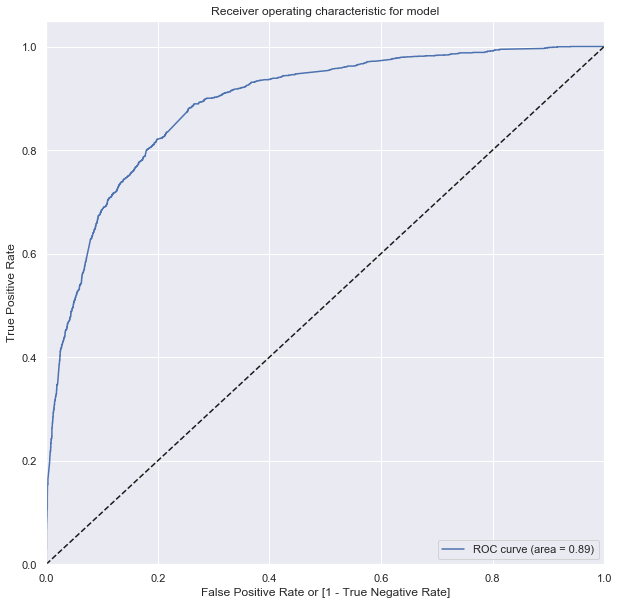

In [62]:
## draw ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [63]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.301104,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.254993,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.347985,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.850624,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.301104,3934,0,1,1,1,1,0,0,0,0,0,0


In [64]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','ppv','npv'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    ppv = cm1[1,1] /(cm1[1,1]+cm1[0,1])
    npv = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,ppv, npv ]
print(cutoff_df)

     prob  accuracy     sensi     speci       ppv       npv
0.0   0.0  0.381262  1.000000  0.000000  0.381262       NaN
0.1   0.1  0.602659  0.977697  0.371564  0.489444  0.964332
0.2   0.2  0.764842  0.911598  0.674413  0.633061  0.925266
0.3   0.3  0.795300  0.873885  0.746877  0.680240  0.905758
0.4   0.4  0.812307  0.766423  0.840580  0.747627  0.853807
0.5   0.5  0.818336  0.701541  0.890305  0.797603  0.828797
0.6   0.6  0.809678  0.635442  0.917041  0.825171  0.803239
0.7   0.7  0.783241  0.519465  0.945777  0.855140  0.761569
0.8   0.8  0.764378  0.433090  0.968516  0.894472  0.734926
0.9   0.9  0.716296  0.274534  0.988506  0.936376  0.688599


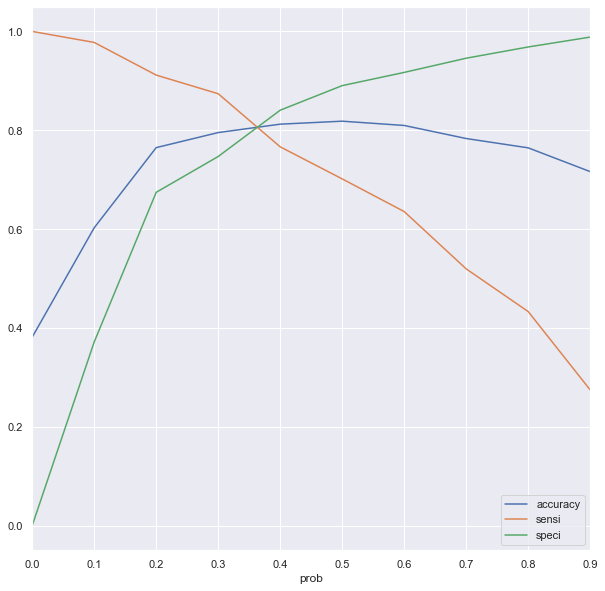

In [65]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10, 10))
plt.show()

**Note** : As per the above plot the optimize value comes at **0.36**. However, our business case is more focused on creating the pool of hot leads which needs to have the more positive prediction value, we hold this value and performs further analysis based on positive predictive value and negative predictive value.

In [66]:
## making our final prediction on basis of optimal cut-off of 0.55
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.301104,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.254993,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.347985,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.850624,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.301104,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [67]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112244897959183

In [68]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3266,  736],
       [ 485, 1981]], dtype=int64)

In [69]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("positive predictive value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))

sensitivity =  0.8033252230332523
specificity =  0.8160919540229885
false postive rate =  0.1839080459770115
positive predictive value =  0.729112992270887
Negative predictive value =  0.8707011463609704


## 10. Business Evaluation : Precision and Recall

In [70]:
## Recreating the final confusion matrix
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_final

array([[3266,  736],
       [ 485, 1981]], dtype=int64)

In [71]:
## Precision
confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])

0.729112992270887

In [72]:
## Recall
confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])

0.8033252230332523

In [73]:
## using precision_score to evaluate matrics
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.729112992270887

In [74]:
## using recall_score to evaluate matrics
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8033252230332523

In [75]:
## using precision_recall_curve from matrics
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

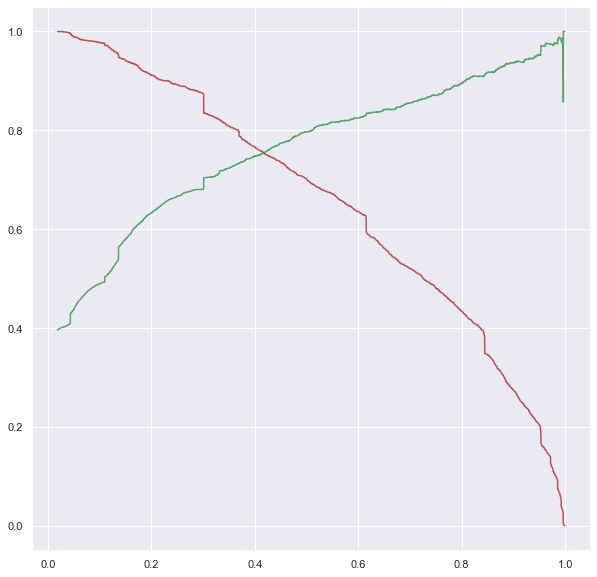

In [76]:
## creating plot from the precision recall curve
plt.figure(figsize=(10, 10))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

## 11. Making prediction for the test data

In [77]:
## transforming using scaler for the numerical values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits'
                                                ,'Total Time Spent on Website','Page Views Per Visit']])

In [78]:
## extracting the featured variables for test dataset
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_LEAD ADD FORM,Lead Source_WELINGAK WEBSITE,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_WORKING PROFESSIONAL,Last Notable Activity_EMAIL BOUNCED,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Activity_CONVERTED TO LEAD,Last Activity_EMAIL BOUNCED,Last Activity_OLARK CHAT CONVERSATION,Last Activity_UNKNOWN,Last Activity_UNREACHABLE,Country_UNKNOWN
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2376,0,-0.885371,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
7766,0,-0.777416,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
9199,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4359,0,-0.885371,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [79]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test)

In [80]:
## making prediction probabilities
y_test_pred = res.predict(X_test_sm)

In [81]:
## checking values
y_test_pred[:10]

4269    0.573030
2376    0.952585
7766    0.922638
9199    0.109898
4359    0.844166
9186    0.620351
1631    0.497614
8963    0.180262
8007    0.023980
5324    0.396019
dtype: float64

In [82]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4269,0.573030
2376,0.952585
7766,0.922638
9199,0.109898
4359,0.844166


In [83]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df['ID'] = y_test_df.index

In [84]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [85]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,0
0,1,4269,0.573030
1,1,2376,0.952585
2,1,7766,0.922638
3,0,9199,0.109898
4,1,4359,0.844166


In [86]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,Converted_Prob
0,4269,1,0.573030
1,2376,1,0.952585
2,7766,1,0.922638
3,9199,0,0.109898
4,4359,1,0.844166


In [87]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [88]:
y_pred_final.head()

,ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.573030,1
1,2376,1,0.952585,1
2,7766,1,0.922638,1
3,9199,0,0.109898,0
4,4359,1,0.844166,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.81998556998557

In [90]:
## creating confusion matrix for test data
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1387,  290],
       [ 209,  886]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("positive predictive value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))

sensitivity =  0.8091324200913242
specificity =  0.827072152653548
false postive rate =  0.172927847346452
positive predictive value =  0.7534013605442177
Negative predictive value =  0.8690476190476191


## 12. Conclusion

The model is prepared for prediction of the conversion of the leads. The probability values are generated by the model. The cut-off decided for the model is **0.36**. All leads whose probability is generated above this threshhold value can be classified as Hot Lead.

## 13. Convert Predicted Probability to Score

In [92]:
#Multiply Converted_Prob with 100
y_pred_final['Score'] = y_pred_final['Converted_Prob'] * 100
y_pred_final.head()

,ID,Converted,Converted_Prob,final_predicted,Score
0,4269,1,0.573030,1,57.303019
1,2376,1,0.952585,1,95.258465
2,7766,1,0.922638,1,92.263778
3,9199,0,0.109898,0,10.989840
4,4359,1,0.844166,1,84.416623
